<a href="https://colab.research.google.com/github/LakshmikanthGopi/Guvi-Assignment/blob/main/Lk_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [62]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# **Linear regression equation for this data**

In [63]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [64]:
df.shape

(15, 2)

In [65]:
x=df.iloc[:, :1].values

y=df.iloc[:,1].values


In [66]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [68]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 32.85912028552135
slope(m) is [2.88775281]


The linear regression equation for this data is given by y=mx+c

where m=2.88 and c=32.86

y_pred=(2.88*x_test)+32.86

In [69]:
y_pred = model.predict(x_test)
y_pred

array([85.9937719 , 78.19683933, 79.06316517, 75.30908652, 77.33051349])

In [70]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred


,Actual,Predicted
0,84.3,85.993772
1,71.6,78.196839
2,80.6,79.063165
3,69.7,75.309087
4,69.4,77.330513


# **Chart the original data and the equation on the chart.**

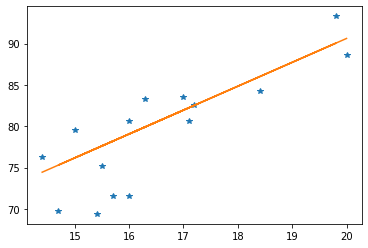

In [71]:
plt.plot(x,y,'*')
plt.plot(x,model.predict(x))

# **Find the equation's  R2  score**

In [72]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error: 4.673409215137767
Mean Squared Error: 28.62078190545443
Root Mean Squared Error: 2.1618069329007543


In [73]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.7062194479867123


The model R2 score is less than 0.8 and there is no strong correlation

# **Extrapolate data: Prediction when ground temperature reached 95**

In [74]:
model.predict([[95]])

array([307.1956368])

the approximate rate would you expect the crickets to be chirping is 307.2

# **Interpolate data: Prediction of ground Temperature at the rate of 18 chirps per second**


In [75]:
df


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [76]:
y=df["Ground Temperature"]
x=df[["Chirps/Second"]]

In [77]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [79]:
model.predict([[18.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([84.83867078])

The Prediction of ground Temperature at the rate of 18 chirps per second is 84.9

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [60]:
df2 = pd.read_fwf("https://raw.githubusercontent.com/LakshmikanthGopi/Datasets/main/brain_body.txt")

In [80]:
df2

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


# **Linear regression equation for this data**

In [84]:
x=df2[["Brain"]]
y=df2["Body"]

In [85]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [87]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 76.38530959255087
slope(m) is [0.96643692]


The linear regression equation for this data is given by y=mx+c

where m=0.966 and c=76.38

y_pred=(0.966*x_test)+76.38

In [88]:
y_pred = model.predict(x_test)
y_pred

array([257.20565655,  77.68999943, 136.30439838, 525.77847548,
        90.71756906, 110.21060165,  76.40753764, 317.99453856,
        76.5032149 ,  77.74798564,  86.04967875,  76.50128202,
        78.02825235, 587.63043809, 579.89894277,  76.39497396,
        77.39040399, 173.02900118,  77.9509374 ])

In [118]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred.head()


,Actual,Predicted
20,419.0,257.205657
2,8.1,77.689999
31,1320.0,136.304398
3,423.0,525.778475
6,98.2,90.717569


# **Chart the original data and the equation on the chart.**

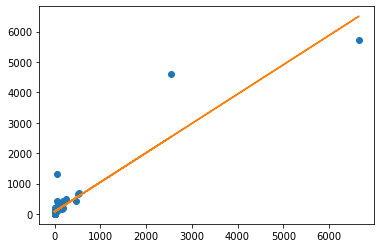

In [91]:
plt.plot(x,y,'o')
plt.plot(x,model.predict(x))

# **The equation's  R2  score**

In [92]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.8969481012772117


The model R2 score is greater than 0.8 and there is strong correlation

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [93]:
df3 = pd.read_fwf("https://raw.githubusercontent.com/LakshmikanthGopi/Datasets/main/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [95]:
df3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


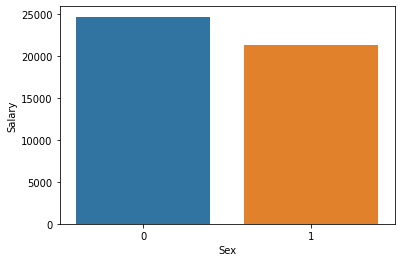

In [96]:
import seaborn as sns
sns.barplot(x='Sex', y='Salary', data=df3, ci=None)


Male staff has higher salary than female staff

# **Linear regression equation for this data**

In [119]:
df3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [120]:
x=df3[["Sex"]]
y=df3["Salary"]

In [121]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [122]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [123]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 25377.827586206895
slope(m) is [-7021.54187192]


In [124]:
y_pred = model.predict(x_test)
y_pred

array([18356.28571429, 25377.82758621, 18356.28571429, 18356.28571429,
       25377.82758621, 25377.82758621, 18356.28571429, 25377.82758621,
       25377.82758621, 18356.28571429, 25377.82758621, 18356.28571429,
       25377.82758621, 25377.82758621, 25377.82758621, 18356.28571429])

In [126]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)
print(R2_score*100,"%")

0.22278234422387133
22.278234422387133 %


In [127]:
x=df3[["Rank"]]
y=df3["Salary"]

In [128]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [130]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 11275.877682403428
slope(m) is [6196.20815451]


In [131]:
y_pred = model.predict(x_test)
y_pred

array([29864.50214592, 17472.08583691, 17472.08583691, 29864.50214592,
       17472.08583691, 17472.08583691, 29864.50214592, 23668.29399142,
       23668.29399142, 17472.08583691, 29864.50214592, 29864.50214592,
       17472.08583691, 29864.50214592, 23668.29399142, 23668.29399142])

In [132]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)
print(R2_score*100,"%")

0.7965034509270601
79.650345092706 %


In [133]:
x=df3[["Year"]]
y=df3["Salary"]

In [134]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [135]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [136]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 17388.576658375794
slope(m) is [842.62275724]


In [137]:
y_pred = model.predict(x_test)
y_pred

array([21601.69044457, 20759.06768733, 19073.82217285, 24129.55871628,
       24972.18147352, 30870.54077419, 23286.93595904, 26657.426988  ,
       24129.55871628, 18231.19941561, 30870.54077419, 17388.57665838,
       19916.44493009, 25814.80423076, 17388.57665838, 22444.31320181])

In [138]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)
print(R2_score*100,"%")

0.6544882257046498
65.44882257046498 %


In [139]:
x=df3[["Degree"]]
y=df3["Salary"]

In [140]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [141]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [142]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 26036.636363636364
slope(m) is [-2914.71636364]


In [143]:
y_pred = model.predict(x_test)
y_pred

array([23121.92      , 23121.92      , 23121.92      , 23121.92      ,
       26036.63636364, 26036.63636364, 23121.92      , 26036.63636364,
       26036.63636364, 23121.92      , 23121.92      , 26036.63636364,
       26036.63636364, 23121.92      , 23121.92      , 26036.63636364])

In [144]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)
print(R2_score*100,"%")

0.05200499316727103
5.200499316727103 %


In [145]:
x=df3[["YSdeg"]]
y=df3["Salary"]

In [146]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [147]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [148]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 17011.441368381806
slope(m) is [466.73909396]


In [149]:
y_pred = model.predict(x_test)
y_pred

array([24479.26687174, 19345.13683818, 19811.87593214, 28213.17962342,
       23545.78868382, 27746.44052946, 29613.39690529, 31480.35328113,
       31480.35328113, 17478.18046234, 25412.74505966, 31947.09237509,
       22145.57140194, 27746.44052946, 20278.6150261 , 30546.87509321])

In [150]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)
print(R2_score*100,"%")

0.6242637545143292
62.426375451432925 %


# **The Conclusion**

The column RANK has the best R2 score

Sex is not an important factor in the Salary